# Modelling iris flower dataset from ```sklearn```

## Import library and modules 

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier


iris_dataset = load_iris()

## Iris dataset 

In [2]:

print("Iris dataset loaded successfully.")

# Printing the entire dataset which consists of data, target, target_names, feature_names, and DESCR
# print(f"Iris :\n{iris_dataset}")
print(f"Iris dataset keys: {iris_dataset.keys()}\n")
for key in iris_dataset.keys():
    print(f"{key} : \n{iris_dataset[key]}\n")
print(f"Shape of the data: {iris_dataset['data'].shape}\n")
print(f"Shape of the target: {iris_dataset['target'].shape}\n")

Iris dataset loaded successfully.
Iris dataset keys: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

data : 
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6

## Splitting the data/target into train and test

In [3]:

X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset["data"],
    iris_dataset["target"],
    test_size=0.25,
    random_state=100
)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (112, 4)
X_test shape: (38, 4)
y_train shape: (112,)
y_test shape: (38,)


## Visualization of the data 

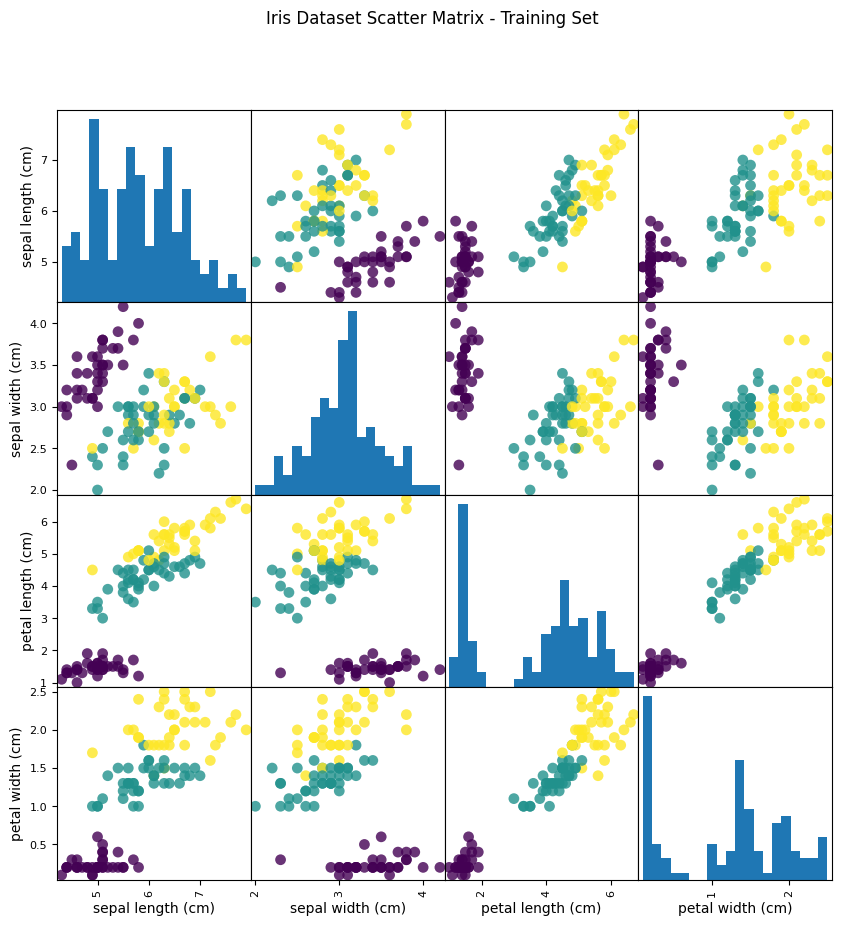

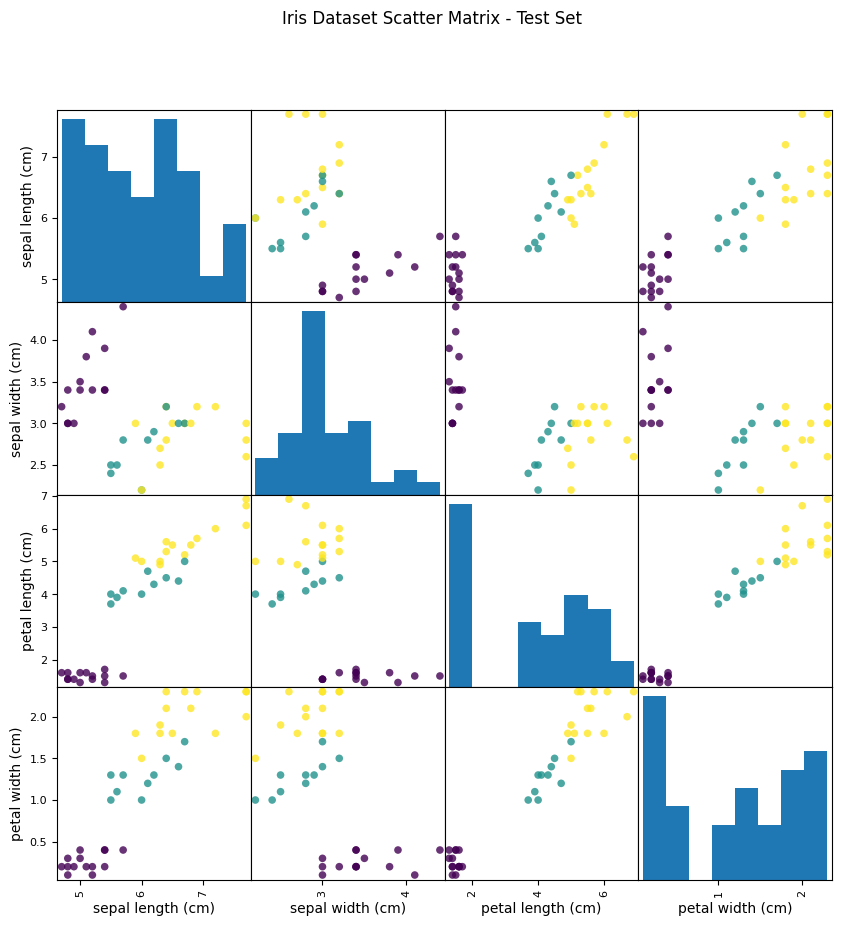

In [4]:
# Creation of pandas dataframe for better visualization
iris_train_dataframe = pd.DataFrame(
    data=X_train,
    columns=iris_dataset["feature_names"]
)
iris_Test_dataframe = pd.DataFrame(
    data=X_test,
    columns=iris_dataset["feature_names"]
)
pd.plotting.scatter_matrix(
    iris_train_dataframe,
    figsize=(10,10),
    marker='o',
    hist_kwds={'bins':20},
    s=60,
    alpha=.8,
    c=y_train,
    cmap='viridis'
)
plt.suptitle("Iris Dataset Scatter Matrix - Training Set")
plt.show()
pd.plotting.scatter_matrix(
    iris_Test_dataframe,
    figsize=(10,10),
    marker='o',
    hist_kwds={'bins':8},
    s=30,
    alpha=.8,
    c=y_test,
    cmap='viridis'
)
plt.suptitle("Iris Dataset Scatter Matrix - Test Set")
plt.show()

## Building the ML models
model: ```KNeighborsClassifier```

In [5]:

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("KNeighborsClassifier model trained successfully.")
y_pred = knn.predict(X_test)
print(f"Predictions on test set: {y_pred}")
accuracy = knn.score(X_test, y_test)
print(f"Model accuracy on test set: {accuracy:.2f}")


KNeighborsClassifier model trained successfully.
Predictions on test set: [2 0 2 0 2 2 0 0 2 0 0 2 0 0 2 1 1 1 2 2 2 0 2 0 1 2 1 0 1 2 1 1 1 0 0 1 0
 1]
Model accuracy on test set: 0.97


## Prediction on new data points 

In [6]:
import numpy as np
X_new = np.array([[5.0, 3.6, 1.3, 0.25],
                  [6.7, 3.0, 5.2, 2.3]])
predictions = knn.predict(X_new)
print(f"Predictions for new data points {X_new} : {predictions}")

Predictions for new data points [[5.   3.6  1.3  0.25]
 [6.7  3.   5.2  2.3 ]] : [0 2]


## Accuracy based on proportion of the training data 
model : knn

In [7]:
proportion_list = np.linspace(0.1, 0.99, 10)
number_sample = []
accuracy_list_1 = []
accuracy_list_2 = []
accuracy_list_3 = []

for proportion in proportion_list:
    X_train_part, X_test_part, y_train_part, y_test_part = train_test_split(
        X_train,
        y_train,
        train_size=proportion,
        random_state=100
    )
    number_sample.append(X_train_part.shape[0])
    knn_partial = KNeighborsClassifier(n_neighbors=1)
    knn_partial.fit(X_train_part, y_train_part)
    accuracy_partial = knn_partial.score(X_test_part, y_test_part)
    accuracy_list_1.append(accuracy_partial)
    del knn_partial
    knn_partial = KNeighborsClassifier(n_neighbors=2)
    knn_partial.fit(X_train_part, y_train_part)
    accuracy_partial = knn_partial.score(X_test_part, y_test_part)
    accuracy_list_2.append(accuracy_partial)
    del knn_partial
    knn_partial = KNeighborsClassifier(n_neighbors=3)
    knn_partial.fit(X_train_part, y_train_part)
    accuracy_partial = knn_partial.score(X_test_part, y_test_part)
    accuracy_list_3.append(accuracy_partial)
    print(f"Training data sample: {number_sample[-1]} and proportion: {proportion:.1f}, Test set accuracy: {accuracy_partial:.2f}")
    del knn_partial

Training data sample: 11 and proportion: 0.1, Test set accuracy: 0.94
Training data sample: 22 and proportion: 0.2, Test set accuracy: 0.97
Training data sample: 33 and proportion: 0.3, Test set accuracy: 0.96
Training data sample: 44 and proportion: 0.4, Test set accuracy: 0.96
Training data sample: 55 and proportion: 0.5, Test set accuracy: 0.98
Training data sample: 66 and proportion: 0.6, Test set accuracy: 0.98
Training data sample: 77 and proportion: 0.7, Test set accuracy: 0.97
Training data sample: 88 and proportion: 0.8, Test set accuracy: 0.96
Training data sample: 99 and proportion: 0.9, Test set accuracy: 0.92
Training data sample: 110 and proportion: 1.0, Test set accuracy: 1.00


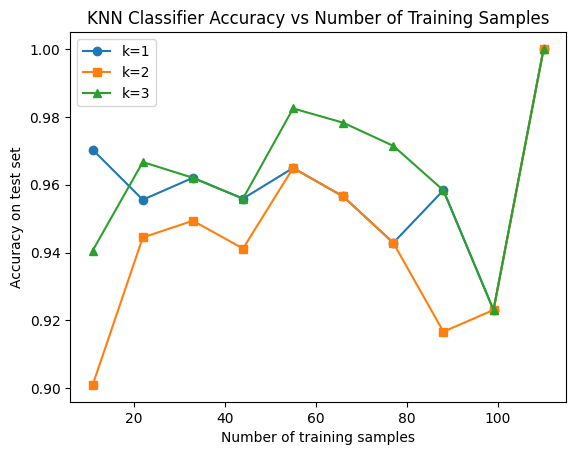

In [8]:
plt.plot(number_sample, accuracy_list_1, marker='o', label='k=1')
plt.plot(number_sample, accuracy_list_2, marker='s', label='k=2')
plt.plot(number_sample, accuracy_list_3, marker='^', label='k=3')
plt.title("KNN Classifier Accuracy vs Number of Training Samples")
plt.xlabel("Number of training samples")
plt.ylabel("Accuracy on test set")
plt.legend()
plt.show()

## Accuracy on different models 

KNN Accuracy: 0.9737
RF Accuracy: 0.9474
SVM Accuracy: 0.9737
LogReg Accuracy: 0.9474
Ridge Accuracy: 0.8421
GradBoost Accuracy: 0.9474
DecTree Accuracy: 0.9474
NaiveBayes Accuracy: 0.9474
MLP Accuracy: 1.0000
SVM-rbf Accuracy: 0.9737


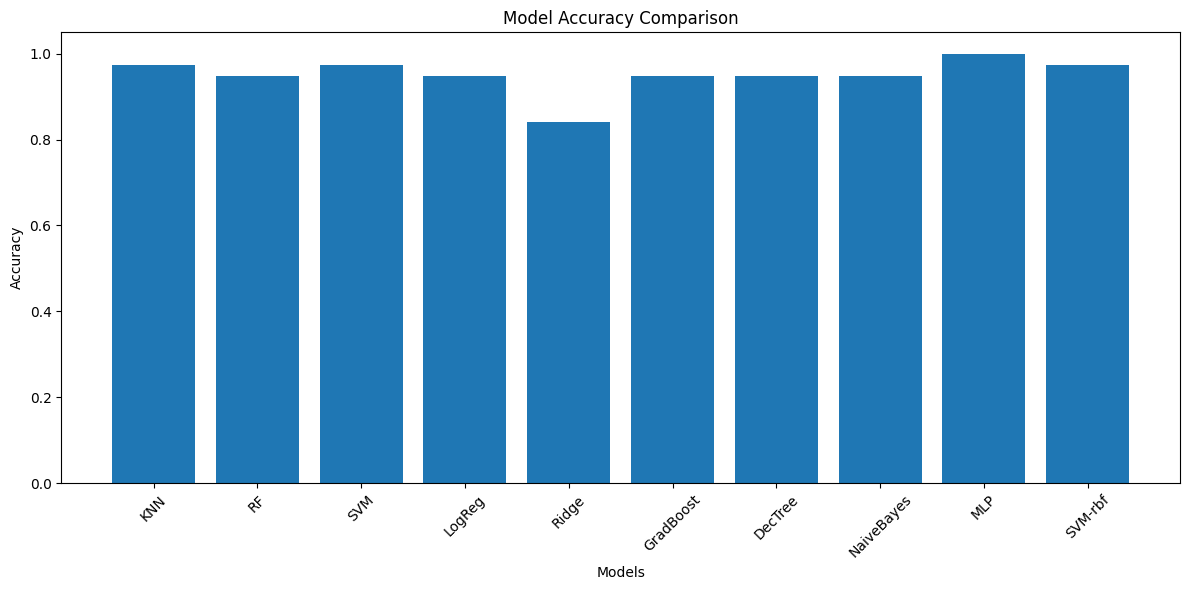

In [9]:
# Define models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'RF': RandomForestClassifier(n_estimators=100, random_state=100),
    'SVM': SVC(random_state=100),
    'LogReg': LogisticRegression(random_state=100),
    'Ridge': RidgeClassifier(random_state=100),
    'GradBoost': GradientBoostingClassifier(random_state=100),
    'DecTree': DecisionTreeClassifier(random_state=100),
    'NaiveBayes': GaussianNB(),
    'MLP': MLPClassifier(random_state=100, max_iter=1000),
    'SVM-rbf': SVC(kernel='rbf', random_state=100)
}

# Train and get accuracy for each model
accuracies = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    accuracies[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.4f}")

# Plot results
plt.figure(figsize=(12, 6))
plt.bar(accuracies.keys(), accuracies.values())
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
